# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 2.2: Modelling Techniques

### 2.2.2 ARIMA

In this module we will introduce ARIMA, an improvement over the ARMA model we reviewed in a past module (1.6.4). We will quickly review the key parts of ARMA as we build to the new ARIMA model:


### Autoregressive Model (AR)

The autoregressive model is used for predicting the value of a variable in a time series. We use the annotation $AR(p)$ for an autoregressive model with $p$ periods.

$AR(p) X_t = c + \sum_{i=1}^p{\beta_i X_{t-i}} + u_t$

We can simplify in the case of an AR(1) model, that is $p=1$. This simplifies further if we also assume a zero mean (which can be done by demeaning the data beforehand, giving $c=0$) and an error term $u$ that is white noise:

$AR(1) = \beta X_{t-1}$

### Moving Average (MA)

A Moving Average (MA) model is given as:

$MA(q) X_t = \mu + \epsilon_{t} + \sum_{i=1}^{q}\theta_i\epsilon_{t-i}$

and specifically the MA(1) process as:

$MA(1)X_t = \epsilon_t + \theta \epsilon_{t-1}$

Here, the values $\epsilon_t$ are the error terms for a given time step $t$ and $\mu$ is the average of the values of $X$.


### ARMA model

The ARMA model is a combination of both the AR model and the MA. It is quite a simple combination - we just concatenate the models, but the training of the model does become more complicated. 

An $ARMA(p, q)$ model, where $p$ is the lag in the autoregressive model and $q$ is the lag in the moving-average model, given as:

$X_t = c + \epsilon_t + \sum_{i=1}^{p}{\beta_i X_{t-i}} + \sum_{i=1}^{q}\theta_i\epsilon_{t-i}$

#### Extended Exercise

It is often argued that cryptocurrency prices for non-Bitcoin coins "follow" Bitcoin, i.e. they lag. Test this hypothesis on a daily level by checking if the values for Ethereum (ETH) and Ripple (XRP) can be modelled using a ARMA model. Test different values for p and q and find the best model.

You can get daily prices from Quandl, via BITFINEX: https://www.quandl.com/data/BITFINEX-Bitfinex

You can review module 1.6.4 for code on how to run the ARMA model in statsmodels.

In [2]:
%run setup.ipy
import quandl
import my_secrets
from statsmodels.tsa import stattools
quandl.ApiConfig.api_key = my_secrets.QUANDL_API_KEY
xrp = quandl.get("BITFINEX/XRPUSD")["Last"]
eth = quandl.get("BITFINEX/ETHUSD")["Last"]

In [20]:
dates = list(set(xrp.index).intersection(eth.index))
dates.sort()
xrp = xrp.loc[dates]
eth = eth.loc[dates]
xrp_stats = stattools.arma_order_select_ic(xrp) 
eth_stats = stattools.arma_order_select_ic(eth) 
xrpparams = xrp_stats['bic_min_order']
ethparams = eth_stats['bic_min_order']
xrp_model = sms.tsa.ARMA(xrp, order=xrpparams)
eth_model = sms.tsa.ARMA(eth, order=ethparams)
xrp_results = xrp_model.fit()
eth_results = eth_model.fit()
display(xrp_results.summary())
display(eth_results.summary())

/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.a

/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.a

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Last   No. Observations:                 1690
Model:                     ARMA(4, 0)   Log Likelihood                2605.822
Method:                       css-mle   S.D. of innovations              0.052
Date:                Thu, 10 Feb 2022   AIC                          -5199.644
Time:                        16:43:08   BIC                          -5167.049
Sample:                             0   HQIC                         -5187.574
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5012      0.088      5.674      0.000       0.328       0.674
ar.L1.Last     1.1565      0.024     48.257      0.000       1.110       1.204
ar.L2.Last    -0.2388      0.037     -6.538      0.000      -0.310      -0.167
ar.L3.Last     0.2369      0.037      6.486      0.000       0.165       0.309
ar.L4.Last    -0.1685      0.024     -7.018      0.000      -0.216      -0.121
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6735           -1.7041j            1.8324           -0.3099
AR.2           -0.6735           +1.7041j            1.8324            0.3099
AR.3            1.0196           -0.0000j            1.0196           -0.0000
AR.4            1.7332           -0.0000j            1.7332           -0.0000
-----------------------------------------------------------------------------
"""

/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Last   No. Observations:                 1690
Model:                     ARMA(3, 2)   Log Likelihood               -9611.103
Method:                       css-mle   S.D. of innovations             71.234
Date:                Thu, 10 Feb 2022   AIC                          19236.205
Time:                        16:43:08   BIC                          19274.233
Sample:                             0   HQIC                         19250.287
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2594.9132        nan        nan        nan         nan         nan
ar.L1.Last    -0.8114      0.023    -35.612      0.000      -0.856      -0.767
ar.L2.Last     0.9110      0.006    156.126      0.000       0.900       0.922
ar.L3.Last     0.8979      0.023     38.606      0.000       0.852       0.943
ma.L1.Last     1.8400      0.017    107.867      0.000       1.807       1.873
ma.L2.Last     0.9484      0.017     54.867      0.000       0.915       0.982
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           -0.0000j            1.0007           -0.0000
AR.2           -1.0077           -0.3125j            1.0550           -0.4521
AR.3           -1.0077           +0.3125j            1.0550            0.4521
MA.1           -0.9701           -0.3367j            1.0269           -0.4468
MA.2           -0.9701           +0.3367j            1.0269            0.4468
-----------------------------------------------------------------------------
"""

*For solutions, see `solutions/arma_cryptocurrency.py`*

### The ARIMA model

One of the issues with the ARMA model is that it requires data to be stationary before the algorithm begins. A normal step for turning non-stationary data into stationary data is to difference the data, either once or twice. Therefore, a normal process is to difference the data and then run ARMA. A problem with this is that we have a two step methodology to describe. ARIMA captures this idea in a single model.

The ARIMA model is a more general form of the ARMA model. Specifically, ARMA(p, q) is an ARIMA(p, 0, q) model. The $p$ and $q$ values are the same as the ARMA model. The middle parameter is $d$, for differencing. The ARIMA model will apply differencing to turn a non-stationary dataset into a stationary one, allowing the AR and MA processes to model them better. That's the same as our two step process above, just captured nicely. And a lot more useful.

That gives the full ARIMA model as:

$ARIMA(p, d, q)$

where $p$ is the lag in the autoregressive model and $q$ is the lag in the moving-average model, and $d$ is the order of differencing applied (i.e. how many times to difference the data to get a stationary series).

The ARIMA model can also be identified by having components "turned off", i.e. set to zero. We saw above that ARIMA(p, 0, q) is simply the ARMA(p, q) model. Further, ARIMA(0, 0, q) is simply MA(q). ARIMA(0, 1, 1) is IMA(1, 1), although that is more obscure than other variants you'll see.

#### Exercise

1. What can the ARIMA(1, 0, 0) model also be known as?
2. What does an ARIMA(0, 0, 0) model actually model? Hint: use the ARMA equation, and set p and q to zero.
3. What does an ARIMA(0, 1, 0) model represent - i.e. what other term have we seen that refers to the same idea?

In [21]:
#1. AR(1) model 2. is just the constant mean 3. It represents I(1)

*For solutions, see `solutions/arima_types.py`*

#### Extended Exercise

The ARIMA model is implemented in statsmodels under `statsmodels.tsa.arima_model.ARIMA` with a similar use case to the `ARMA` model previously used. Perform an ARIMA modelling on the cryptocurrency data from the previous exercise.

Normally, the value for $d$ is determined before running the model, but performing a test of stationarity. See Module 1.6.2 for information on performing these tests. Simply difference the data, check for stationarity, and if it isn't, difference it again. Values more than 3 are abnormal - if you still aren't getting stationary data at that point, check your assumptions.

In [23]:
xrp_stats = stattools.arma_order_select_ic(xrp) 
eth_stats = stattools.arma_order_select_ic(eth) 
xrpparams = xrp_stats['bic_min_order']
ethparams = eth_stats['bic_min_order']
xrp_model = sms.tsa.ARIMA(xrp, order=(xrpparams[0],1,xrpparams[1]))
eth_model = sms.tsa.ARIMA(eth, order=(ethparams[0],1,ethparams[1]))
xrp_results = xrp_model.fit()
eth_results = eth_model.fit()
display(xrp_results.summary())
display(eth_results.summary())

/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.a

/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.a

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Last   No. Observations:                 1689
Model:                 ARIMA(4, 1, 0)   Log Likelihood                2598.545
Method:                       css-mle   S.D. of innovations              0.052
Date:                Thu, 10 Feb 2022   AIC                          -5185.090
Time:                        16:48:50   BIC                          -5152.499
Sample:                             1   HQIC                         -5173.021
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.002      0.208      0.835      -0.003       0.004
ar.L1.D.Last     0.1621      0.024      6.663      0.000       0.114       0.210
ar.L2.D.Last    -0.0741      0.024     -3.047      0.002      -0.122      -0.026
ar.L3.D.Last     0.1587      0.024      6.509      0.000       0.111       0.206
ar.L4.D.Last     0.0143      0.024      0.587      0.557      -0.033       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7249           -0.0000j            1.7249           -0.0000
AR.2           -0.5767           -1.7725j            1.8639           -0.3001
AR.3           -0.5767           +1.7725j            1.8639            0.3001
AR.4          -11.6729           -0.0000j           11.6729           -0.5000
-----------------------------------------------------------------------------
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Last   No. Observations:                 1689
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -9600.805
Method:                       css-mle   S.D. of innovations             71.180
Date:                Thu, 10 Feb 2022   AIC                          19215.610
Time:                        16:48:50   BIC                          19253.634
Sample:                             1   HQIC                         19229.691
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.8407      1.707      1.078      0.281      -1.505       5.187
ar.L1.D.Last    -1.8377      0.030    -61.647      0.000      -1.896      -1.779
ar.L2.D.Last    -0.9622      0.049    -19.769      0.000      -1.058      -0.867
ar.L3.D.Last    -0.0380      0.026     -1.478      0.139      -0.088       0.012
ma.L1.D.Last     1.8361      0.017    105.853      0.000       1.802       1.870
ma.L2.D.Last     0.9468      0.016     57.446      0.000       0.915       0.979
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0138           -0.3192j            1.0629           -0.4514
AR.2           -1.0138           +0.3192j            1.0629            0.4514
AR.3          -23.3234           -0.0000j           23.3234           -0.5000
MA.1           -0.9696           -0.3406j            1.0277           -0.4462
MA.2           -0.9696           +0.3406j            1.0277            0.4462
-----------------------------------------------------------------------------
"""

*For solutions, see `solutions/arima_cryptocurrency.py`*

### Choosing parameters

When choosing parameters for the ARIMA model, the normal rule of thumb is "keep them small". Robert Nau summarised this as:

<i>In most cases either p is zero or q is zero, and p+q is less than or equal to 3, so there aren’t very many terms on the right-hand-side of this equation</i>

<small>See https://people.duke.edu/~rnau/Notes_on_nonseasonal_ARIMA_models--Robert_Nau.pdf</small>

Galit Shmueli has some further insight into this problem in her video on YouTube: https://www.youtube.com/watch?v=0xHf-SJ9Z9U

When performing a grid search (in other words, "try all combinations of these values for the parameters") you can keep your search space small by trying 0, 1, 2 and 3 as the only options (and just 0, 1, 2 for $d$). If that model isn't sufficient, **and** you have a good theoretical reason for a different value. For seasonal change, for instance, if you suspect a yearly trend (this June's data will be dependent on last June's), then seasonal ARIMA is needed, which we will cover later in this module.

In [24]:
import quandl

In [25]:
from statsmodels import api as sms

In [26]:
employment = quandl.get("FRED/NROUST").diff().dropna()

In [27]:
changes = employment.diff().dropna()

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
model = ARIMA(changes, order=(1, 1, 1))

/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency inf

In [30]:
results = model.fit()

/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                  329
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1018.750
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 10 Feb 2022   AIC                          -2029.500
Time:                        16:52:21   BIC                          -2014.316
Sample:                    10-01-1949   HQIC                         -2023.443
                         - 10-01-2031                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.741e-07   5.24e-06      0.071      0.943   -9.89e-06    1.06e-05
ar.L1.D.Value    -0.1977      0.054     -3.660      0.000      -0.304      -0.092
ma.L1.D.Value    -1.0000      0.008   -125.173      0.000      -1.016      -0.984
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.0592           +0.0000j            5.0592            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

#### Exercise

Play around with the values for order and test out several types. How does the summary results change? What extra variables are added? How are they added, for instance, when you set $p=2$?

In [80]:
model = ARIMA(changes, order=(2, 1, 1))

/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency inf

In [81]:
results = model.fit()
results.summary()

/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                  329
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1019.809
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 10 Feb 2022   AIC                          -2029.619
Time:                        17:00:14   BIC                          -2010.639
Sample:                    10-01-1949   HQIC                         -2022.047
                         - 10-01-2031                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.732e-07   5.65e-06      0.066      0.947   -1.07e-05    1.14e-05
ar.L1.D.Value    -0.1825      0.055     -3.319      0.001      -0.290      -0.075
ar.L2.D.Value     0.0774      0.055      1.411      0.158      -0.030       0.185
ma.L1.D.Value    -1.0000      0.008   -126.519      0.000      -1.015      -0.985
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.6037           +0.0000j            2.6037            0.5000
AR.2            4.9599           +0.0000j            4.9599            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

Note: There are no solutions for this exercise - just try different values and examine the result.

### Testing your ARIMA model

With your ARIMA model, you can test the residuals of the model to confirm they are white noise, or whether there is an additional correlation in the residuals that needs to be modelled. The Ljung-Box tests the following hypotheses:

$H_0$: The data are independently distributed

$H_A$: The data is not independently distributed, that is that they have a serial correlation.

Such a serial correlation indicates that the ARIMA model hasn't done its job well, indicative of a bad choice of parameters for $p$ and $q$, mainly $q$.

The test itself is:

$Q = n(n + 2)\sum_{k=1}^{h}\frac{p^2}{n-k}$

Where $n$ is the size of the dataset, $h$ is the number of lags being tested

In [82]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [83]:
test_statistics, p_values = acorr_ljungbox(results.resid)

/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/stats/diagnostic.py:533: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
/Users/yudizhou/opt/anaconda3/envs/tens/lib/python3.6/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [84]:
p_values > 0.05

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

#### Exercise

Review carefully these results, compared against the hypothesis stated for the Ljung-Box test. What are the results saying?

Hint: for documentation on the function itself, see https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html

In [85]:
#It means we should reject the null hypothesis with lag 1,2 and 3.

*For solutions, see `solutions/ljungbox.py`*

### Prediction with ARIMA

ARIMA models can be used for predicting future values. 
The prediction confidence interval from an ARIMA model will be wider for data with a higher volatility.

An ARIMA model is often harder to analyse than a simple Linear Regression model. For this reason, analysis of the fitted parameters (and meta-parameters, internal states of the model) are not often performed to understand "why" the model fit the way it did. Compare this to Linear Regression models, where we can interpret the $\beta$ values to understand why the model fit the way it did.

In [86]:
changes.tail()

,Value
Date,
2030-10-01,0.000026
2031-01-01,0.000039
2031-04-01,0.000048
2031-07-01,0.000051
2031-10-01,0.000042


In [87]:
changes["2000"]

,Value
Date,
2000-01-01,-0.000088
2000-04-01,-0.000089
2000-07-01,-0.000085
2000-10-01,-0.000069


In [88]:
# Predict values within the sample
from datetime import datetime

start_date = datetime(2000, 1, 1)
end_date = datetime(2001, 10, 1)

y_pred = results.predict(start_date, end_date)
y_pred.name = "Predictions"

In [89]:
%run setup.ipy

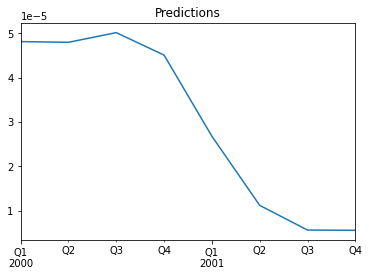

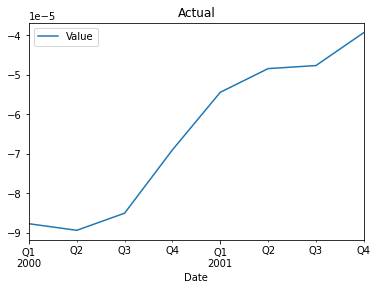

In [90]:
y_pred.plot(title="Predictions")
changes[start_date:end_date].plot(title="Actual");

In [91]:
# Perform out-of-sample prediction of data past the end of the data we have
y_new = results.forecast(steps=10)  # You can also use the predict method with a start/end date in the future:
# y_new = results.predict(len(changes), end=len(changes)+10, dynamic=True)

In [92]:
results.forecast?

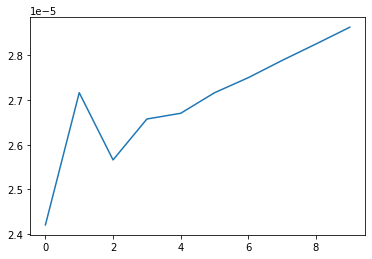

In [94]:
plt.plot(y_new[0])

#### Exercise

Compute the SSE value on the predicted values from 2015 onwards. Remember to retrain your model after doing a train/test split before you evaluate!

*For solutions, see `solutions/arima_sse.py`*

### Seasonal ARIMA

Seasonal variations are not included by default in an ARIMA model. You can approximate this with lag periods of your season, for instance, setting $d=12$. A Seasonal ARIMA model has parameters for both the standard ARIMA model, and additional ones for the seasonality. This gives the full model as: 

$ARIMA(p, d, q)(P, D, Q)$

Alternatively you may see this model written as $ARIMA(p, d, q)x(P, D, Q)$.

Where $p$, $d$ and $q$ are as with ARIMA, and $P$, $D$, and $Q$ are the same as their lowercase version, except with a seasonal lag added in. For example,  D is seasonal lag, setting $y_t = y_t - y_{t-M}$ where $M$ is the seasonal lag period (if you have monthly data and want yearly differencing, $M=12$).

As with ARIMA, and all the model we have seen so far, any of these values could be zero, effectively turning that part of the model off. Unlike non-seasonal ARIMA, we normally still refer to the model by it's full name, i.e. ARIMA(0, 0, 1)(1, 1, 0), (as opposed to, say, MASAR(1, 1) or some weird combination).

In statsmodels, the name of this model is SARIMAX - Seasonal ARIMA, with eXogenous regressors (additional independent variables).

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
seasonal_model = SARIMAX(changes, order=(1, 1, 1), seasonal_order=(0, 1, 0, 4))

/home/rob/anaconda3/envs/quant/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [36]:
results = seasonal_model.fit()

/home/rob/anaconda3/envs/quant/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Value   No. Observations:                  322
Model:             SARIMAX(1, 1, 1)x(0, 1, 0, 4)   Log Likelihood                 891.773
Date:                           Mon, 13 May 2019   AIC                          -1777.546
Time:                                   11:14:20   BIC                          -1766.269
Sample:                               07-01-1949   HQIC                         -1773.041
                                    - 10-01-2029                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3695      0.020    -18.912      0.000      -0.408      -0.331
ma.L1         -0.9999      1.169     -0.856      0.392      -3.290       1.291
sigma2         0.0002      0.000      0.850      0.395      -0.000       0.001
===================================================================================
Ljung-Box (Q):                      196.94   Jarque-Bera (JB):              7969.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             713.28   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Exercise

1. Check the documentation for SARIMAX on the statsmodels website. These values were set in the previous code example?
2. Choose a seasonal commodity from Quandl, such as Wheat, and apply a Seasonal ARIMA to the data.

*For solutions see `solutions/arima_seasonal.py`*

#### Extended Exercise Automating parameter selection

As we saw above, choosing parameters for ARIMA is a fairly straight-forward process, using AIC to choose the best from a subset of features. This process is easily automatable, and has been automated in a few libraries. In the R programming language, the ARIMA implementation already includes it, while it is a separate module for statsmodels in Python. You can get the code from https://github.com/tgsmith61591/pmdarima

Install the package on your system and run on the data you received for the exercises in this module (cryptocurrency and seasonal commodity). What parameters does it choose, and how effective was the algorithm?

As a warning, automated parameter selection is basically a brute force selection. Generally it composes the following steps:

1. Try all parameter combinations from those given
2. Evaluate all of them using some metric
3. Choose the best one.

Some algorithms exist separately to optimise and improve this process by being a bit more clever about their search, but these options are not available in `pmdarima`.

Further, the documenation for this library also contains additional information on choosing parameter bounds that is worth reading for a more complete picture of ARIMA.